In [248]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [249]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a threshold value

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8
    ### START YOUR CODE HERE ### (You can change anything inside this block) 
    # You can also define other helper functions
    # Compute normalized histogram
    rows, columns = im.shape
    bins = np.arange(0, 255+2)
    # bins = 257
    hist, bin_edges = np.histogram(im.flatten(), bins=bins)
    # print(hist)
    
    row, col = im.shape 
    y = np.zeros(256)
    MN=rows*columns
    hist_norm = hist/MN
    # visualize the normalized histogram
    #should sum to 1 (some rounding error is to be expected):
    # print(f"sum of norm_hist: {sum(hist_norm)}")
    
    threshold = 0 # between 0 and 255
    pi =0
    P_k =np.zeros(256)
    mi =0
    m_k =np.zeros(256)
    
    D_k = np.zeros(256)
    
    for k in range(0, len(hist)):
        pi += hist_norm[k]
        P_k[k]= pi
        mi += k*hist_norm[k]
        m_k[k]=mi

    m_g = m_k[-1]
    for k in range(0, len(hist)):
        if P_k[k] == 0:
            D_k[k] = 0
        else:
            D_k[k]=( ((m_g*P_k[k] - m_k[k])**2) / (P_k[k]*(1-P_k[k])) )
     
    D_k_max_loc = D_k.argmax()
    
    D_k_max_val = D_k[D_k_max_loc]
    
    
    threshold=D_k_max_loc
    return threshold
    ### END YOUR CODE HERE ###

Reading image: images/thumbprint.png
Found optimal threshold: 153


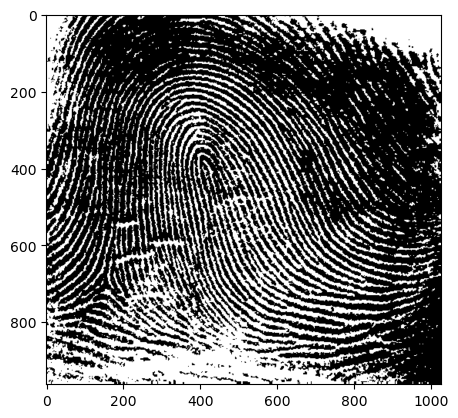

Saving image to: image_processed/thumbprint-segmented.png
Reading image: images/rice-shaded.png
Found optimal threshold: 134


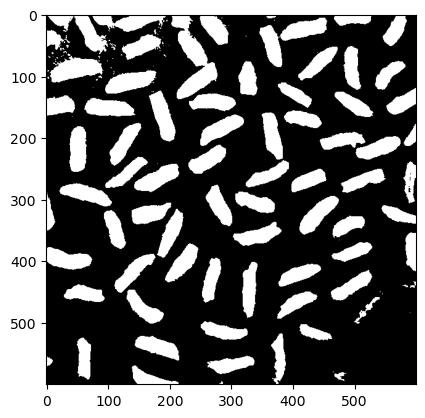

Saving image to: image_processed/rice-shaded-segmented.png


In [250]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("rice-shaded.png")
    ]
    for impath in impaths_to_segment:
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)
        plt.imshow(segmented_image, cmap="gray")
        plt.show()

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)